(1040, 1392, 3)


<Figure size 432x288 with 0 Axes>

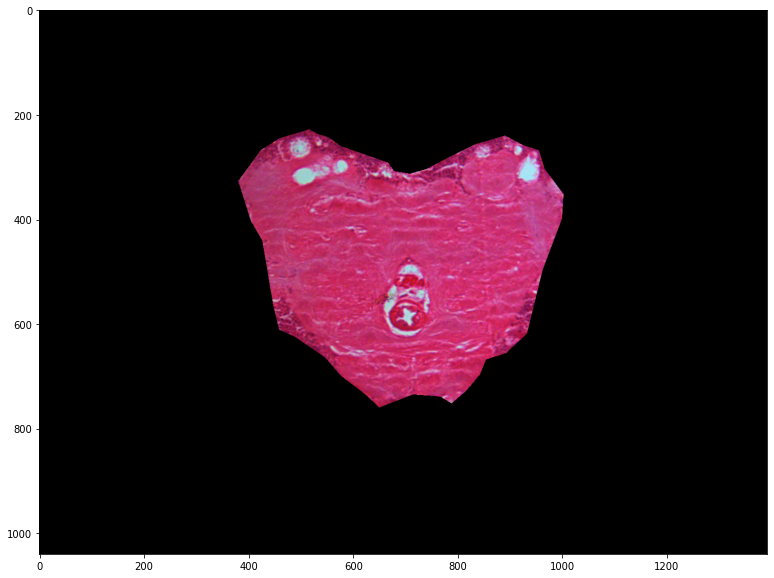

In [1]:
import numpy as np
import matplotlib
import PIL
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()

# Load image
img=np.array(PIL.Image.open("18_cut.tif"))
# img=img[:-100,:,:]
plt.figure(figsize=(20,10))
print(img.shape)
plt.imshow(img)

<Figure size 1440x720 with 0 Axes>

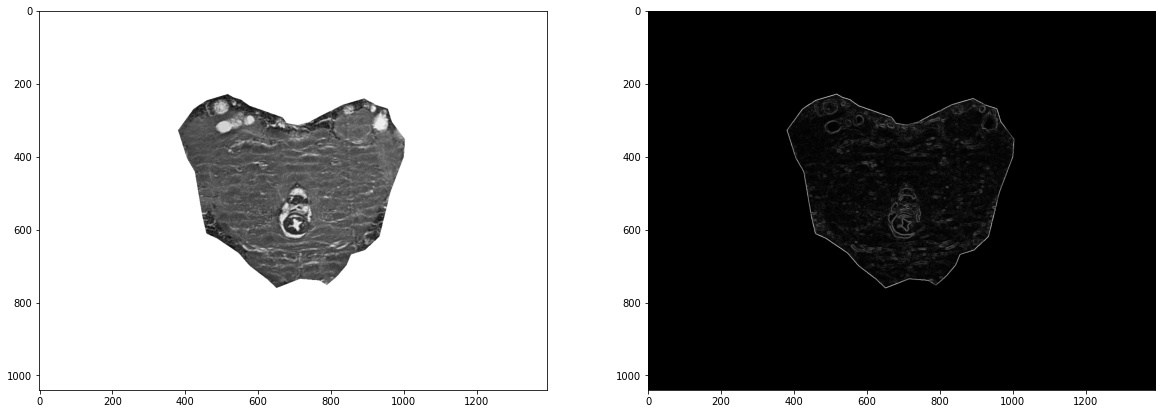

In [2]:
from skimage.filters import sobel
plt.figure(figsize=(20,10))

data=np.dot(img[...,:3],[.299,.587,.114])
# data=scipy.ndimage.minimum_filter(data,7)
dvalue=data[data>.01].flatten()
data[data<.01]=np.max(data)
elevation_map = sobel(data)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(elevation_map)



In [10]:
data2 = np.reshape(data,(1040,1392,1))
data2.shape

(1040, 1392, 1)

In [11]:
import cv2
 
# Set our filtering parameters
# Initialize parameter setting using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()
 
# Set Area filtering parameters
params.filterByArea = False
# params.minArea = 100
 
# Set Circularity filtering parameters
params.filterByCircularity = False
# params.minCircularity = 0.1
 
# Set Convexity filtering parameters
# params.filterByConvexity = True
params.filterByConvexity = False
# params.minConvexity = 0.1
     
# Set inertia filtering parameters
# params.filterByInertia = True
params.filterByInertia = False
# params.minInertiaRatio = 0.05
#params.maxInertiaRatio = 0.3

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
     
# Detect blobs
keypoints = detector.detect(data2)
#keypoints


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\blobdetector.cpp:319: error: (-210:Unsupported format or combination of formats) Blob detector only supports 8-bit images! in function 'cv::SimpleBlobDetectorImpl::detect'


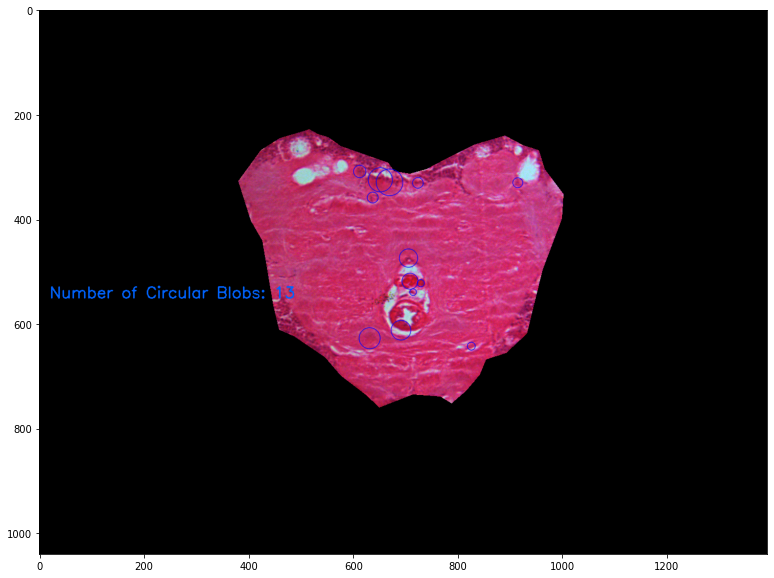

In [46]:

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))

blobs = cv2.drawKeypoints(img, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)
 
# Show blobs
plt.figure(figsize=(20,10))
plt.imshow(blobs)
#cv2.imshow("Filtering Circular Blobs Only", blobs)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
from skimage.filters import sobel
plt.figure(figsize=(20,10))

data=np.dot(img[...,:3],[.299,.587,.114])
# data=scipy.ndimage.minimum_filter(data,7)
dvalue=data[data>.01].flatten()
data[data<.01]=np.max(data)
elevation_map = sobel(data)

plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(elevation_map)

In [ ]:
import cv2
import numpy as np

 # path
path = r'C:\Users\ruthb\Documents\BCM\PhD project\Results\Machine learning - Counting vacuoles\counting_vacuoles_in_retina\18_cut.tif'

# Load image
image = cv2.imread('./18_cut.tif', 0)

#cv2.imshow('image',image)
#cv2.waitKey(0)

In [ ]:
 
# Set our filtering parameters
# Initialize parameter setting using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()
 
# Set Area filtering parameters
params.filterByArea = True
params.minArea = 1
 
# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.9
 
# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.2
     
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
     
# Detect blobs
keypoints = detector.detect(image)
keypoints

In [ ]:
keypoints

In [ ]:

# Draw blobs on our image as red circles
blank = np.zeros((1, 1))

blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)
 
# Show blobs
cv2.imshow("Filtering Circular Blobs Only", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

(<matplotlib.image.AxesImage at 0x25223a18280>, (-0.5, 1391.5, 1039.5, -0.5))

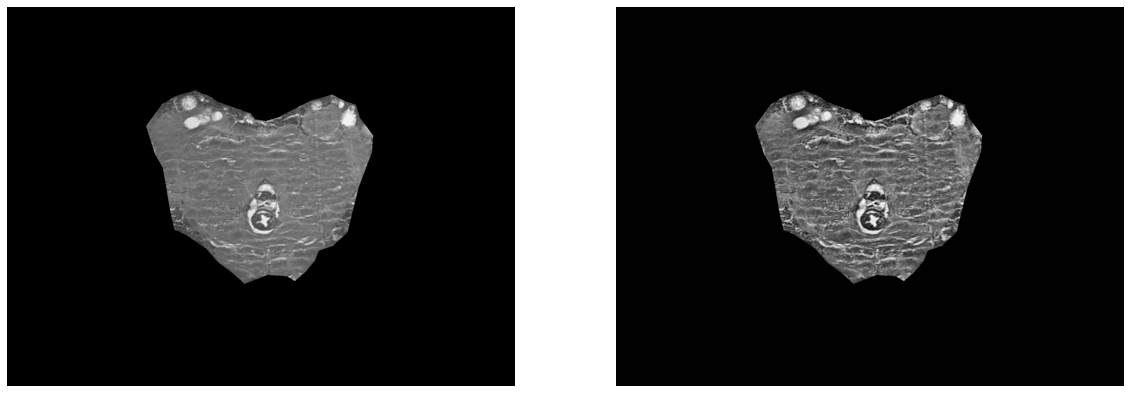

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# The input image.
image = cv2.imread("18_cut.tif", 0) # image loaded as grayscale

down_width = 80
down_height = 50
down_points = (down_width, down_height)
resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

# Enhance image
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# # Top Hat Transform
# topHat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)# Black Hat Transform
# blackHat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
# # image_enhanced = image + topHat - blackHat
img = image
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32))
img = clahe.apply(img)
# img[img<.01]=np.max(img)


# kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (255, 255))
# close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
# div = np.float32(img) / (close)
# res = np.uint8(cv2.normalize(div, div, 0, 255, cv2.NORM_MINMAX))


# plt.figure(figsize=(20,10))
# plt.hist(img,range=[0, 255])
# plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img, cmap="gray"), plt.axis("off")

Number of blobs detected are :  16


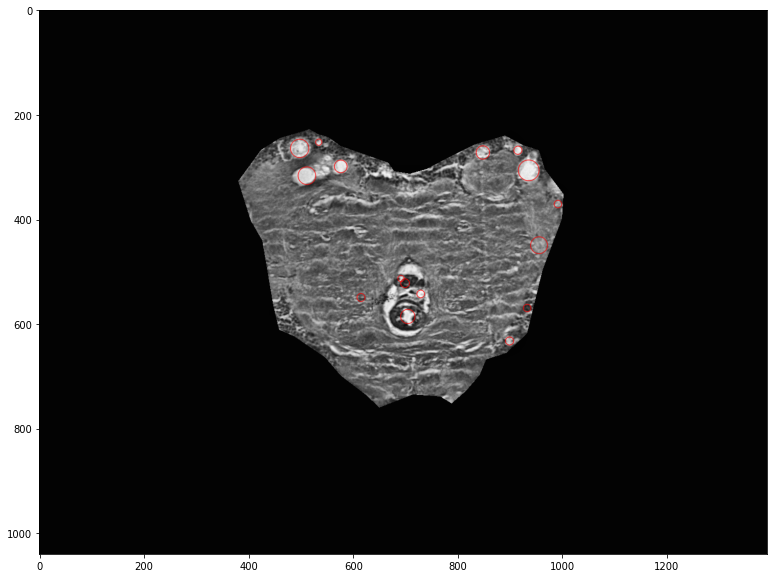

In [159]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Define thresholds
#Can define thresholdStep. See documentation. 
params.minThreshold = 0
params.maxThreshold = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 80 # TODO: update to 5 micro
params.maxArea = 10000

# Filter by Color (black=0)
params.filterByColor = True  #Set true for cast_iron as we'll be detecting black regions
params.blobColor = 255

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.6
params.maxConvexity = 1

# Filter by InertiaRatio
params.filterByInertia = True
params.minInertiaRatio = 0.4
params.maxInertiaRatio = 1

# Distance Between Blobs
params.minDistBetweenBlobs = 0

# Setup the detector with parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(img)

print("Number of blobs detected are : ", len(keypoints))


# Draw blobs
img_with_blobs = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(20,10))
#plt.imshow(img_with_blobs)
plt.imshow(cv2.cvtColor(img_with_blobs, cv2.COLOR_BGR2RGB))

# Save result
#cv2.imwrite("particle_blobs.jpg", img_with_blobs)

Number of blobs detected are :  7


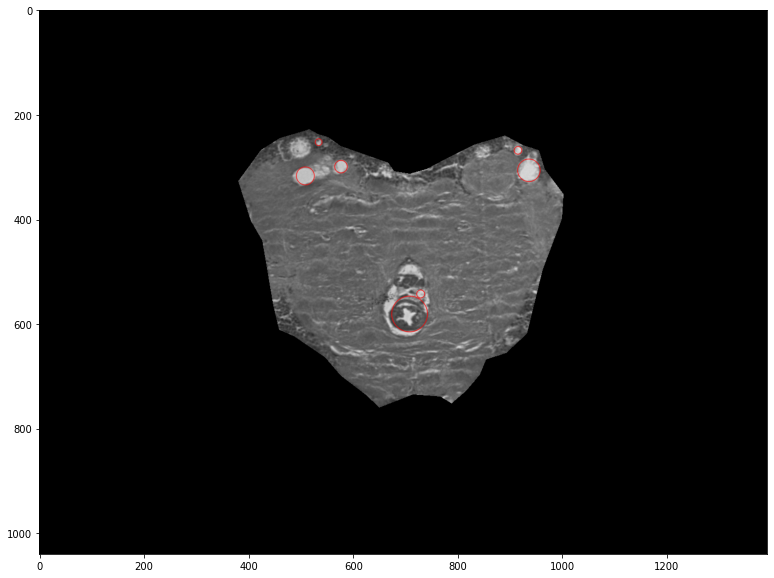

In [47]:
#Video Playlist: https://www.youtube.com/playlist?list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG

"""
https://www.learnopencv.com/blob-detection-using-opencv-python-c/
BLOB stands for Binary Large OBject and refers to a group of connected pixels in a binary image.
A Blob is a group of connected pixels in an image that share some common
property ( E.g grayscale value ). In the image above, the dark connected regions are blobs, 
and the goal of blob detection is to identify and mark these regions.
How it works:
    1. Threshold input images to binary.
    2. Grouping: connected white/black pixels are grouped together. 
    3. Merging: blobs located closer than minDistBetweenBlobs are merged.
    4. Center & Radius Calculation :  The centers and radii of the new merged blobs are computed and returned.
    
Can be filtered by color, size or shape
"""

import matplotlib.pyplot as plt
import numpy as np
import cv2

# The input image.
image = cv2.imread("18_cut.tif", 0)
#image = cv2.imread("images/Osteosarcoma_01_small.tif")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
#image=image[:,:,0] 

#No need to pre-threshold as blob detector has build in threshold.
#We can supply a pre-thresholded image.

# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Define thresholds
#Can define thresholdStep. See documentation. 
params.minThreshold = 0
params.maxThreshold = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 50 # TODO: update to 5 micro
params.maxArea = 10000

# Filter by Color (black=0)
params.filterByColor = False  #Set true for cast_iron as we'll be detecting black regions
# params.blobColor = 255

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.7
params.maxConvexity = 1

# Filter by InertiaRatio
params.filterByInertia = True
params.minInertiaRatio = 0.3
params.maxInertiaRatio = 1

# Distance Between Blobs
params.minDistBetweenBlobs = 0

# Setup the detector with parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

print("Number of blobs detected are : ", len(keypoints))


# Draw blobs
img_with_blobs = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(20,10))
#plt.imshow(img_with_blobs)
plt.imshow(cv2.cvtColor(img_with_blobs, cv2.COLOR_BGR2RGB))

# Save result
#cv2.imwrite("particle_blobs.jpg", img_with_blobs)